In [15]:
from pathlib import Path
import math

from ai_data_eng.searching.graph import *
from ai_data_eng.searching.utils import *
from ai_data_eng.searching.heuristics import *
import matplotlib.pyplot as plt 

DATA_DIR = Path('../data')

In [45]:
connection_graph = pd.read_csv(DATA_DIR / 'connection_graph.csv')
g = Graph(connection_graph, add_constant_change_time)

C:\Users\julia\AppData\Local\Temp\ipykernel_20092\3409294157.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  connection_graph = pd.read_csv(DATA_DIR / 'connection_graph.csv')


In [46]:
s = 200000
g.conn_graph.iloc[s:s + 40]

,Unnamed: 0,company,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,departure_sec,arrival_sec
200000,200000,MPK Tramwaje,10,04:48:00,04:49:00,LEŚNICA,Jeleniogórska,51.144689,16.872345,51.145192,16.878428,17280,17340
200001,200001,MPK Tramwaje,10,04:49:00,04:50:00,Jeleniogórska,Wschowska,51.145192,16.878428,51.144781,16.881725,17340,17400
200002,200002,MPK Tramwaje,10,04:50:00,04:51:00,Wschowska,Złotnicka,51.144781,16.881725,51.143759,16.889999,17400,17460
200003,200003,MPK Tramwaje,10,04:51:00,04:52:00,Złotnicka,Kamiennogórska (Ośrodek dla niewidomych),51.143759,16.889999,51.142493,16.900049,17460,17520
200004,200004,MPK Tramwaje,10,04:52:00,04:54:00,Kamiennogórska (Ośrodek dla niewidomych),Kosmonautów (Szpital),51.142493,16.900049,51.141738,16.906053,17520,17640
200005,200005,MPK Tramwaje,10,04:54:00,04:56:00,Kosmonautów (Szpital),Grabowa,51.141738,16.906053,51.139775,16.921389,17640,17760
200006,200006,MPK Tramwaje,10,04:56:00,04:57:00,Grabowa,Aleja Architektów,51.139775,16.921389,51.138819,16.929059,17760,17820
200007,200007,MPK Tramwaje,10,04:57:00,04:59:00,Aleja Architektów,Glinianki,51.138819,16.929059,51.137924,16.936373,17820,17940
200008,200008,MPK Tramwaje,10,04:59:00,05:00:00,Glinianki,Tarczyński Arena (Lotnicza),51.137924,16.936373,51.137149,16.941061,17940,18000
200009,200009,MPK Tramwaje,10,05:00:00,05:02:00,Tarczyński Arena (Lotnicza),PILCZYCE,51.137149,16.941061,51.135948,16.950539,18000,18120


In [18]:
def heuristic_test(heuristic):
    def run_heuristic(start, end):
        actual_times = []
        heuristic_times = []
        for i in range(start, end):
            actual_time = time_diff(i + 1, end)    # aka cost 
            prev_time = time_diff(start, i)
            actual_times.append(actual_time)
            heuristic_time = heuristic.compute(stop_as_tuple(g.conn_at_index(start)), stop_as_tuple(g.conn_at_index(end)), g.conn_at_index(i), g.conn_at_index(i + 1), prev_time)
            heuristic_times.append(heuristic_time)
            if not heuristic_time <= actual_time:
                print(f'[{i}] {heuristic_time} > {actual_time}!')    
        
        print(f'{start} -> {end} : SUCCESS')
        return actual_times, heuristic_times
    return run_heuristic

def time_diff(i_1, i_2=None):
    if i_2 is None:
        i_2 = i_1
    return diff(g.conn_graph.loc[i_2, 'arrival_sec'], g.conn_graph.loc[i_1, 'departure_sec'])

def visualize_heuristic(actual_times, heuristic_times, name):
    plt.figure(figsize=(10, 5))
    plt.title(name)
    plt.plot(range(len(actual_times)), actual_times, label='Actual')
    plt.plot(range(len(heuristic_times)), heuristic_times, label='Heuristic')
    plt.legend()

127746 -> 127756 : SUCCESS
0 -> 43 : SUCCESS
30550 -> 30573 : SUCCESS
181624 -> 181660 : SUCCESS
543733 -> 543769 : SUCCESS
612939 -> 612964 : SUCCESS
894607 -> 894620 : SUCCESS
1000 -> 1019 : SUCCESS
81496 -> 81525 : SUCCESS
433500 -> 433524 : SUCCESS


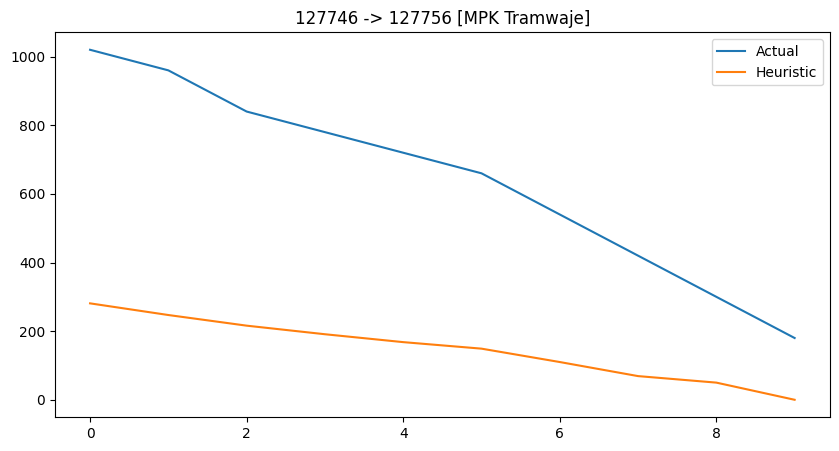

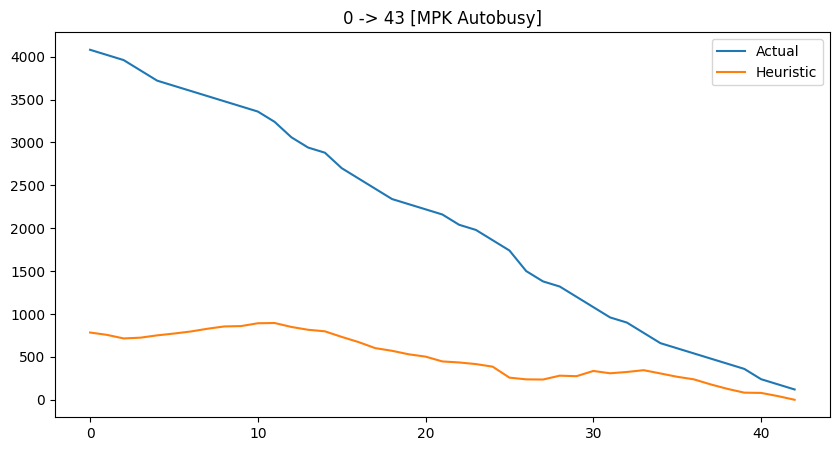

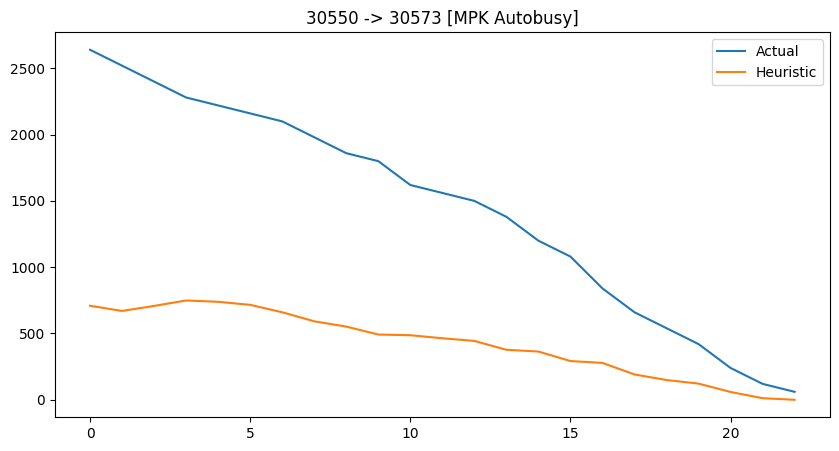

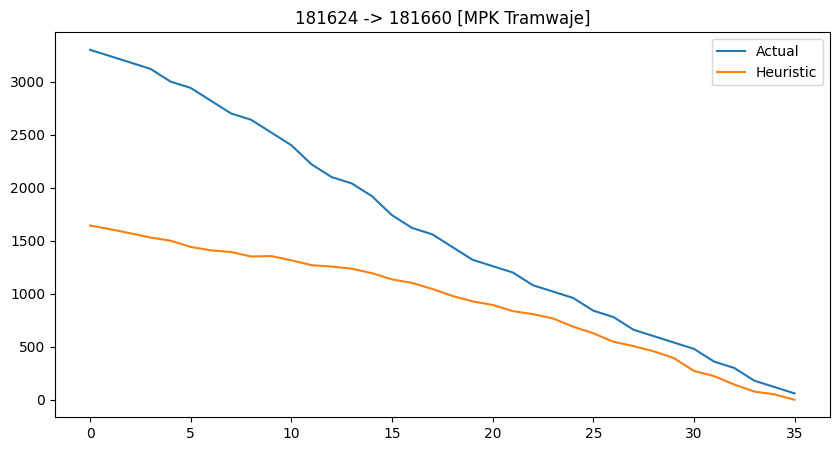

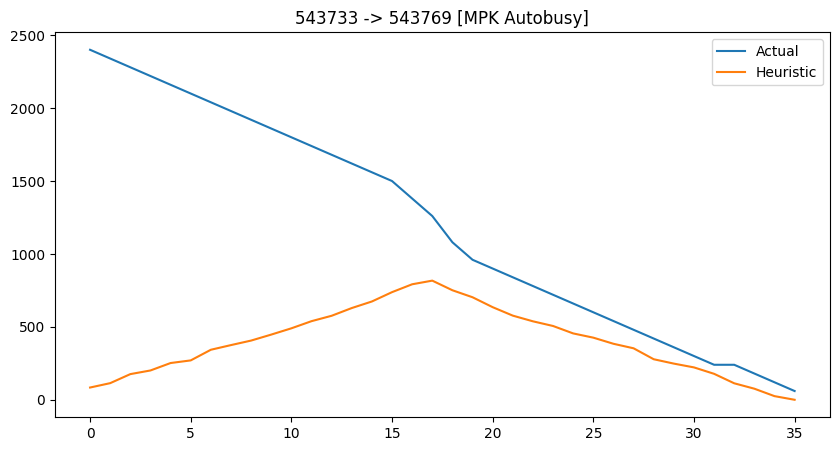

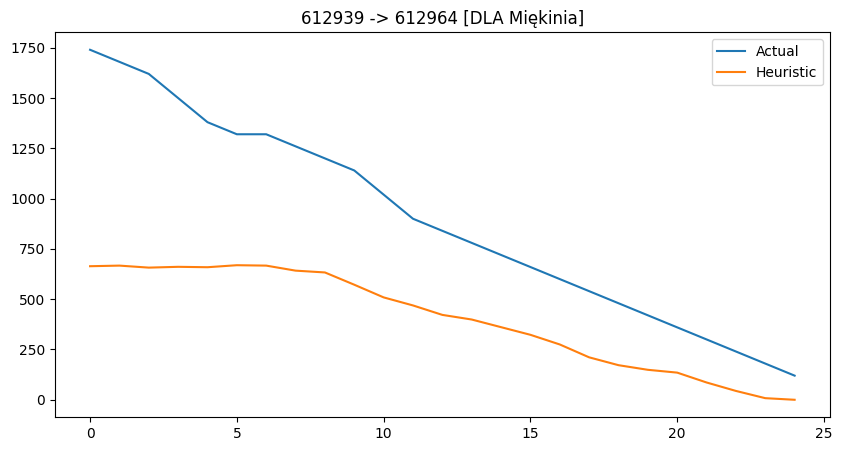

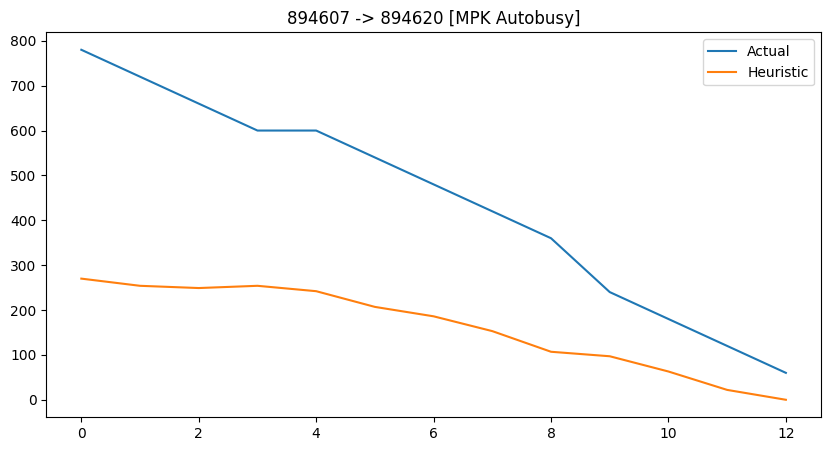

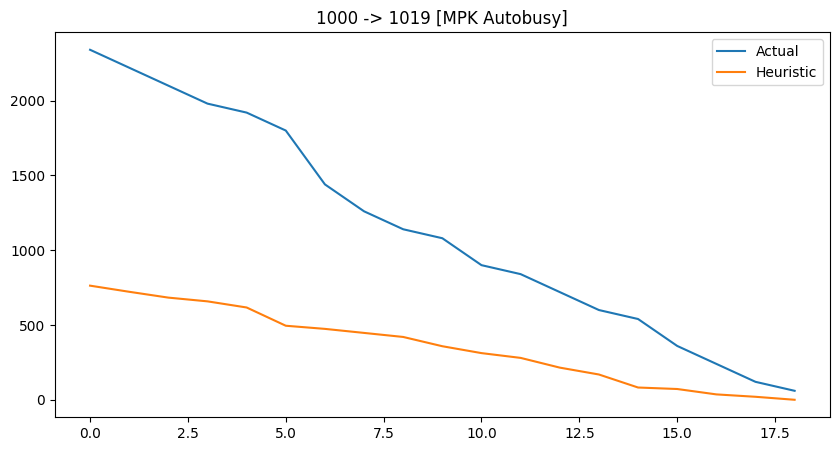

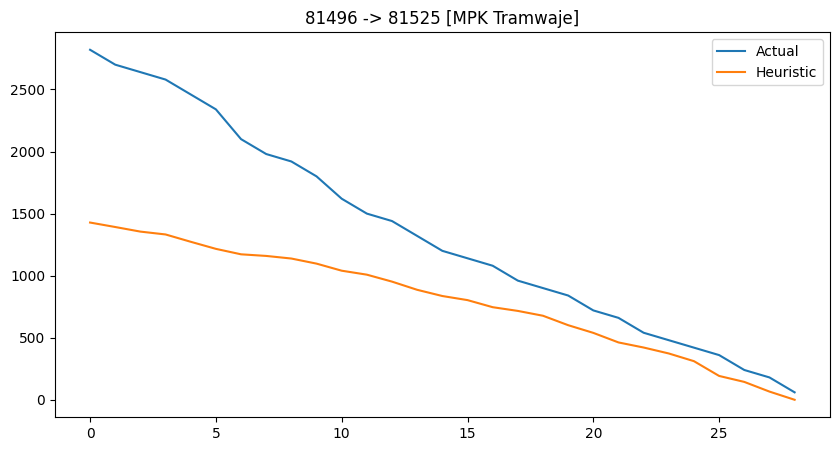

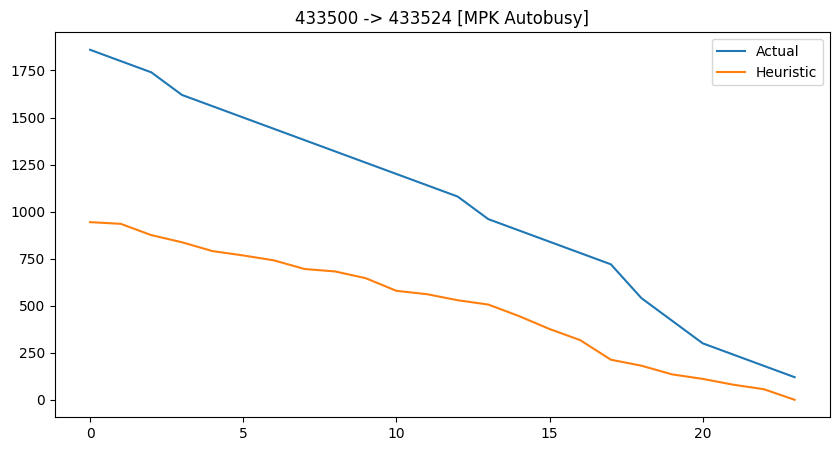

In [47]:
test_cases = [(127746, 127756), (0, 43), (30550, 30573), (181624, 181660), (543733, 543769), (612939, 612964), (894607, 894620), (1000, 1019), (81496, 81525), (433500, 433524)]
for start, end in test_cases:
    weighted_avg_time_heuristic = WeightedAverageTimeHeuristic(epsilon=0.1)
    actual_times, heuristic_times = heuristic_test(weighted_avg_time_heuristic)(start, end)
    visualize_heuristic(actual_times, heuristic_times, f'{start} -> {end} [{g.conn_at_index(start)["company"]}]')

In [2]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopy.distance

In [4]:
def distance_m(stop_from: Stop, stop_to: Stop):
    # return (geopy.distance.geodesic((stop_from[1], stop_from[2]), (stop_to[1], stop_to[2])).m)
    #return abs((stop_from[1] - stop_to[1]) * 100000) + abs((stop_from[2] - stop_to[2]) * 100000)
    return (geopy.distance.geodesic((stop_from[1], stop_from[2]), (stop_to[1], stop_to[2])).m)

def distance_round(stop_from: Stop, stop_to: Stop):
    straight_dis = distance_m(stop_from, stop_to)
    return round(math.pi * straight_dis / 2, 2)

def approximate_velocity(stop_from: Stop, stop_to: Stop, conn_time: float):
    return distance_m(stop_from, stop_to) / conn_time

def approximate_velocity_round(stop_from: Stop, stop_to: Stop, conn_time: float):
    return distance_round(stop_from, stop_to) / conn_time

In [ ]:
g.conn_graph.loc[182859, 'start_stop'].isin({'Kliniki - Politechnika Wrocławska': 1})

In [5]:
len(g.conn_graph)

456019

In [9]:
g.get_earliest_from(time_to_normalized_sec('20:30:00'), ('Kliniki - Politechnika Wrocławska', 51.11114106, 17.0611933), '')

,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,departure_sec,arrival_sec
182859,10,20:30:00,20:32:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109713,17.065111,51.111623,17.059965,73800,73920
320922,19,20:33:00,20:35:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109713,17.065111,51.111157,17.061465,73980,74100
183733,10,20:33:00,20:35:00,Kliniki - Politechnika Wrocławska,Hala Stulecia,51.109206,17.066414,51.106895,17.073720,73980,74100
98583,4,20:35:00,20:37:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109713,17.065111,51.111444,17.059960,74100,74220
550449,115,20:35:00,20:37:00,Kliniki - Politechnika Wrocławska,Mickiewicza,51.109283,17.066162,51.108517,17.072661,74100,74220
544231,115,20:37:00,20:39:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109322,17.066281,51.111621,17.060086,74220,74340
834929,145,20:43:00,20:44:00,Kliniki - Politechnika Wrocławska,Hala Stulecia,51.109283,17.066162,51.107040,17.072832,74580,74640
846218,146,20:42:00,20:44:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109322,17.066281,51.111406,17.059852,74520,74640
918817,253,28:26:00,28:28:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109322,17.066281,51.111957,17.062550,15960,16080


In [10]:
g.conn_graph.loc[182859:182862]

,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,departure_sec,arrival_sec
182859,10,20:30:00,20:32:00,Kliniki - Politechnika Wrocławska,PL. GRUNWALDZKI,51.109713,17.065111,51.111623,17.059965,73800,73920
182860,10,20:32:00,20:33:00,PL. GRUNWALDZKI,Reja,51.111623,17.059965,51.112449,17.056866,73920,73980
182861,10,20:33:00,20:35:00,Reja,Katedra,51.112449,17.056866,51.113317,17.050035,73980,74100
182862,10,20:35:00,20:37:00,Katedra,Urząd Wojewódzki (Muzeum Narodowe),51.113317,17.050035,51.109673,17.047755,74100,74220


In [15]:
g.get_possible_stops_t('Kliniki - Politechnika Wrocławska')

[('Kliniki - Politechnika Wrocławska', 51.10920637, 17.06641438),
 ('Kliniki - Politechnika Wrocławska', 51.10971261, 17.06511141),
 ('Kliniki - Politechnika Wrocławska', 51.10932241, 17.06628139),
 ('Kliniki - Politechnika Wrocławska', 51.109283, 17.066162)]

In [16]:
g.get_possible_stops_t('BISKUPIN')

[('BISKUPIN', 51.10125726, 17.10914151),
 ('BISKUPIN', 51.10098894, 17.10878688),
 ('BISKUPIN', 51.10116255, 17.10835396)]

In [49]:
s1 = ('PL. GRUNWALDZKI', 51.111452, 17.060529)
s2 = ('Kliniki - Politechnika Wrocławska', 51.10920637, 17.06641438)

In [52]:
(s1[2] - s2[2]) * 100000

-588.5380000002272

In [69]:
distance_m(s1, s2)

481.96372668060195

In [80]:
distance_round(s1, s2)

757.07

In [70]:
approximate_velocity(g.stop_as_tuple(g.rename_stop(g.conn_at_index(550448))), 
                     ('PL. GRUNWALDZKI', 51.11114106, 17.0611933), 120)

3.372767672729071

In [82]:
approximate_velocity_round(g.stop_as_tuple(g.rename_stop(g.conn_at_index(550448))), 
                     ('PL. GRUNWALDZKI', 51.11114106, 17.0611933), 120)

5.297916666666667

In [87]:
def heuristic(stop_from: Stop, stop_to: Stop, goal_stop: Stop, conn_time: float):
    return distance_m(stop_to, goal_stop) / (approximate_velocity(stop_from, stop_to, conn_time))

def heuristic_round(stop_from: Stop, stop_to: Stop, goal_stop: Stop, conn_time: float):
    return distance_m(stop_to, goal_stop) / (approximate_velocity_round(stop_from, stop_to, conn_time))

In [89]:
sec_to_time(heuristic(('PL. GRUNWALDZKI', 51.111452, 17.060529), ('Kliniki - Politechnika Wrocławska', 51.10920637, 17.06641438), 
          ('BISKUPIN', 51.10125726, 17.10914151), 120))

'00:12:56'

In [90]:
sec_to_time(heuristic_round(('PL. GRUNWALDZKI', 51.111452, 17.060529), ('Kliniki - Politechnika Wrocławska', 51.10920637, 17.06641438), 
          ('BISKUPIN', 51.10125726, 17.10914151), 120))

'00:08:14'

Obserwacja: prędkość będzie niedoszacowana bo obliczona odległość między przystankami jest po lini prostej 

In [91]:
approximate_velocity(('PL. GRUNWALDZKI', 51.11114106, 17.0611933), g.stop_as_tuple(g.rename_stop(g.conn_at_index(65896))), 240)

4.151701920791827

In [98]:
g.conn_graph.loc[65894:65902]

,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,departure_sec,arrival_sec
65894,2,20:34:00,20:37:00,Reja,PL. GRUNWALDZKI,51.112786,17.055565,51.111452,17.060529,74040,74220
65895,2,20:37:00,20:39:00,PL. GRUNWALDZKI,Kliniki - Politechnika Wrocławska,51.111452,17.060529,51.109206,17.066414,74220,74340
65896,2,20:39:00,20:41:00,Kliniki - Politechnika Wrocławska,Hala Stulecia,51.109206,17.066414,51.106895,17.073720,74340,74460
65897,2,20:41:00,20:42:00,Hala Stulecia,ZOO,51.106895,17.073720,51.105614,17.077418,74460,74520
65898,2,20:42:00,20:43:00,ZOO,Tramwajowa,51.105614,17.077418,51.104328,17.084212,74520,74580
65899,2,20:43:00,20:44:00,Tramwajowa,Chełmońskiego,51.104328,17.084212,51.103757,17.090927,74580,74640
65900,2,20:44:00,20:45:00,Chełmońskiego,Piramowicza (Kampus Biskupin),51.103757,17.090927,51.103082,17.096406,74640,74700
65901,2,20:45:00,20:46:00,Piramowicza (Kampus Biskupin),Spółdzielcza,51.103082,17.096406,51.102206,17.101808,74700,74760
65902,2,20:46:00,20:48:00,Spółdzielcza,BISKUPIN,51.102206,17.101808,51.101257,17.109142,74760,74880


In [100]:
time_diff(65895, 65895)

120

In [105]:
heuristic_round(g.stop_as_tuple(g.rename_stop(g.conn_at_index(65894))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(65895))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(65902))), time_diff(65895))

494.6482234459787

In [106]:
assert heuristic_round(g.stop_as_tuple(g.rename_stop(g.conn_at_index(65894))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(65895))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(65902))), time_diff(65895)) < time_diff(65895, 65902)

In [109]:
heuristic_round(g.stop_as_tuple(g.rename_stop(g.conn_at_index(65894))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(65895))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(65902))), time_diff(65895))

494.6482234459787

In [390]:
def visualize_heuristic(actual_times, heuristic_times, velocities, name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(name)
    plt.plot(range(len(actual_times)), actual_times, label='Actual')
    plt.plot(range(len(heuristic_times)), heuristic_times, label='Heuristic')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(len(velocities)), velocities, label='Velocities')
    plt.legend()

In [391]:
start, stop = 65894, 65902
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop) 
    heuristic_time = heuristic_round(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))), time_diff(i + 1))
    assert heuristic_time <= actual_time
    print(f'actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

actual time: 00:11:00, heuristic time: 00:08:14
actual time: 00:09:00, heuristic time: 00:05:41
actual time: 00:07:00, heuristic time: 00:04:53
actual time: 00:06:00, heuristic time: 00:02:16
actual time: 00:05:00, heuristic time: 00:01:45
actual time: 00:04:00, heuristic time: 00:01:29
actual time: 00:03:00, heuristic time: 00:00:51
actual time: 00:02:00, heuristic time: 00:00:00


In [392]:
start, stop = 0, 29
actual_times = []
heuristic_times = []
running_dist = 0
alpha = 0.1
velocity = 2
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    running_dist += distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    #running_dist = distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(start))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))))
    time_from_start = time_diff(start, i + 1) 
    velocity = 0.1 * (running_dist / time_from_start) + (1 - alpha) * velocity
    heuristic_time =  distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop)))) / velocity
    
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[0] actual time: 00:48:00, heuristic time: 00:46:00
[1] actual time: 00:47:00, heuristic time: 00:39:48
[2] actual time: 00:46:00, heuristic time: 00:34:12
[3] actual time: 00:44:00, heuristic time: 00:33:00
[4] actual time: 00:42:00, heuristic time: 00:32:43
[5] actual time: 00:41:00, heuristic time: 00:31:54
[6] actual time: 00:40:00, heuristic time: 00:31:28
[7] actual time: 00:39:00, heuristic time: 00:31:37
[8] actual time: 00:38:00, heuristic time: 00:31:18
[9] actual time: 00:37:00, heuristic time: 00:30:24
[10] actual time: 00:36:00, heuristic time: 00:30:56
[11] actual time: 00:34:00, heuristic time: 00:30:00
[12] actual time: 00:31:00, heuristic time: 00:27:54
[13] actual time: 00:29:00, heuristic time: 00:26:28
[14] actual time: 00:28:00, heuristic time: 00:26:16
[15] actual time: 00:25:00, heuristic time: 00:23:26
[16] actual time: 00:23:00, heuristic time: 00:21:22
[17] actual time: 00:21:00, heuristic time: 00:19:17
[18] actual time: 00:19:00, heuristic time: 00:18:15
[19

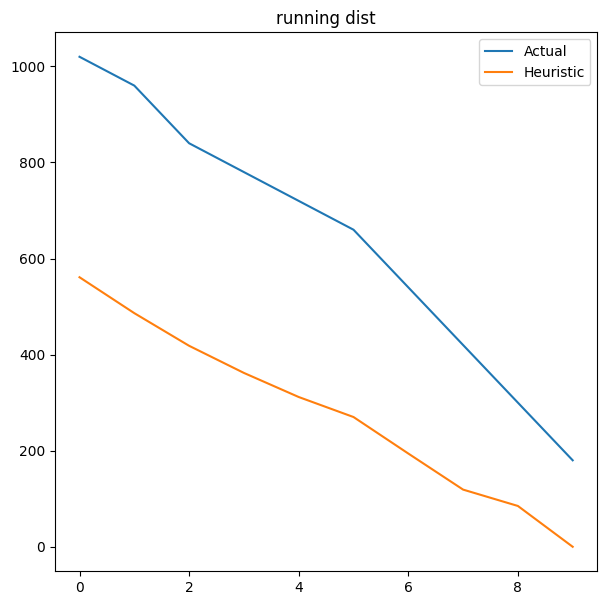

In [285]:
visualize_heuristic(actual_times, heuristic_times, 'running dist')

In [35]:
def dis(i_1, i_2):
        return distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i_1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i_2)))) 

def run_heuristic(start, stop, alpha=0.1, velocity=1):
    
    actual_times = []
    heuristic_times = []
    velocities = []
    for i in range(start, stop):
        actual_time = time_diff(i + 1, stop)    # aka cost 
        actual_times.append(actual_time)
        #dist_from_start = dis(i, start)
        #time_from_start = time_diff(start, i + 1) 
        dist_from_prev = dis(i, i + 1)
        time_from_prev = time_diff(i + 1)
        if time_from_prev > 0:
            velocity = alpha * (dist_from_prev / (time_from_prev)) + (1 - alpha) * velocity
        heuristic_time =  dis(i + 1, stop) / velocity
        # check whether this heuristic overestimates
        #if (dist_from_start / velocity) > time_from_start:
         #   velocity *= 1.1
        velocities.append(velocity)
        heuristic_times.append(heuristic_time)
        # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
        # print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')
    print(f'{start} -> {stop} : SUCCESS')
    return actual_times, heuristic_times, velocities



In [525]:
velocity, alpha = 10, 0.01

127746 -> 127756 : SUCCESS
0 -> 43 : SUCCESS
30550 -> 30573 : SUCCESS
181624 -> 181660 : SUCCESS
543733 -> 543769 : SUCCESS
612939 -> 612964 : SUCCESS
894607 -> 894620 : SUCCESS


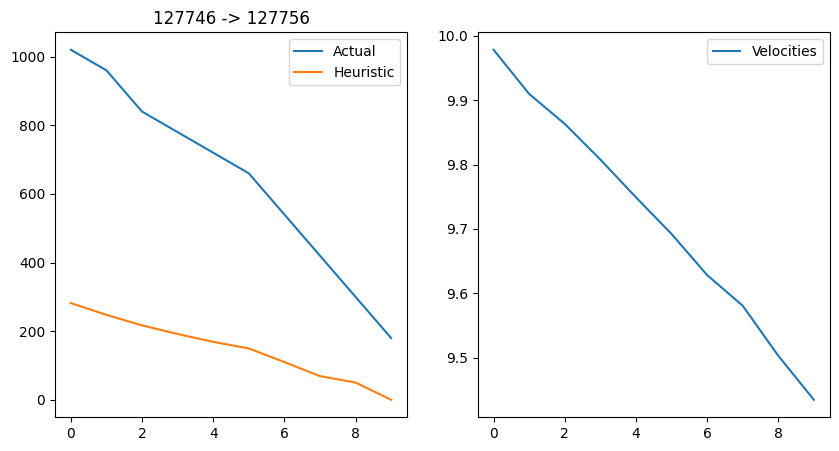

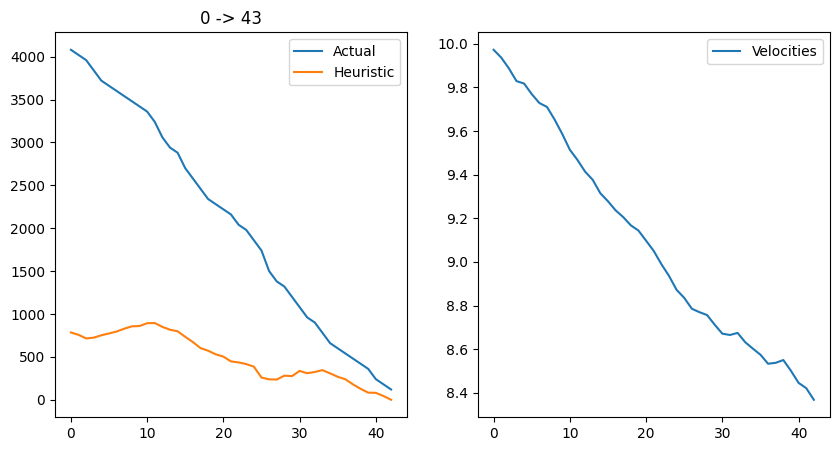

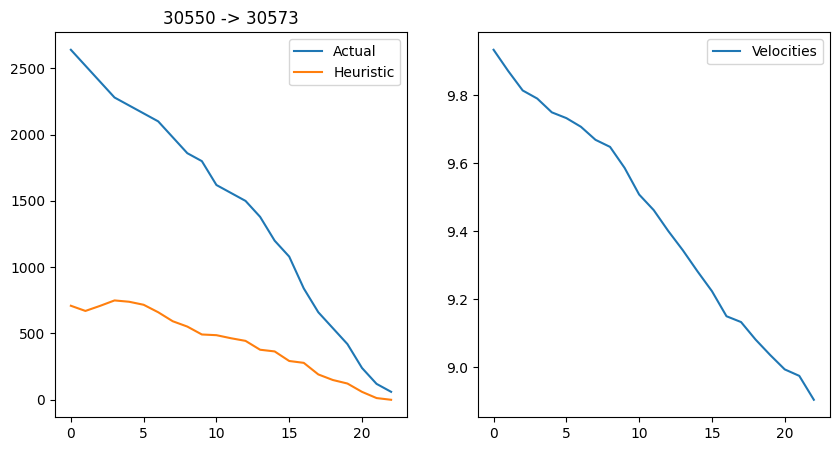

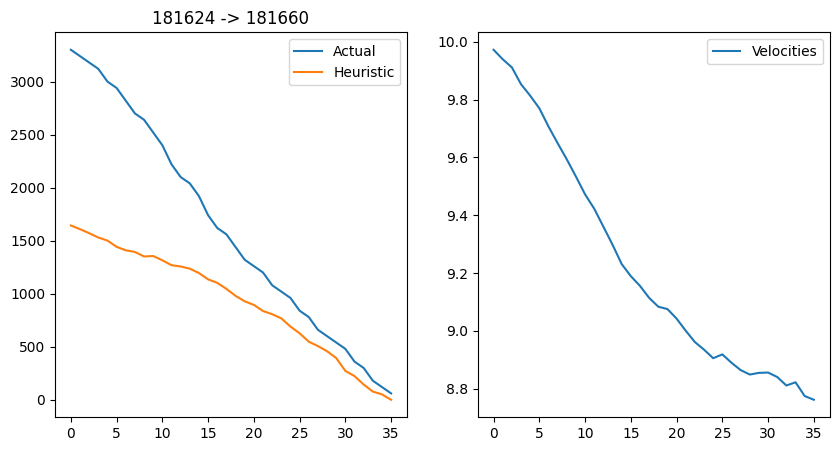

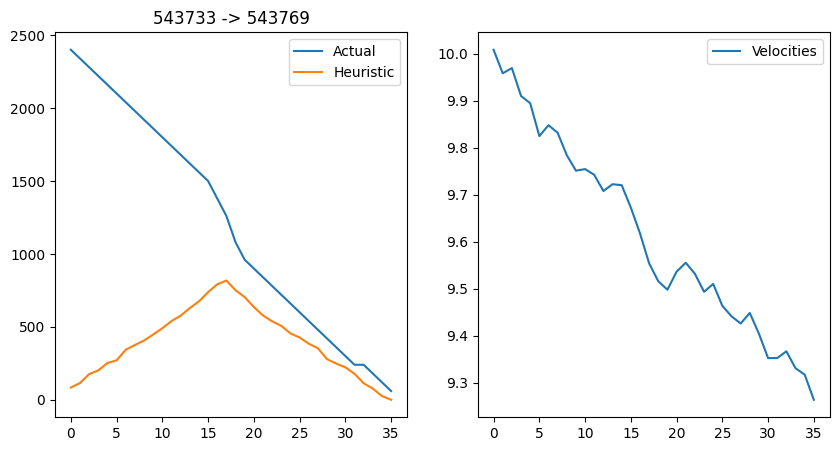

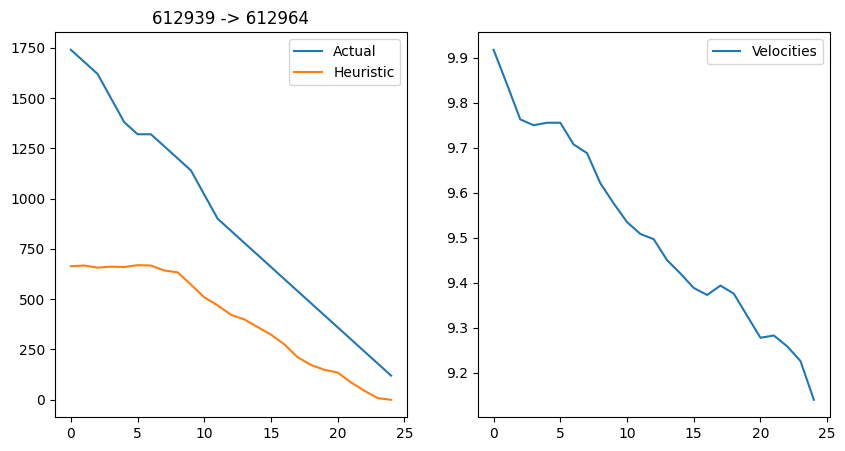

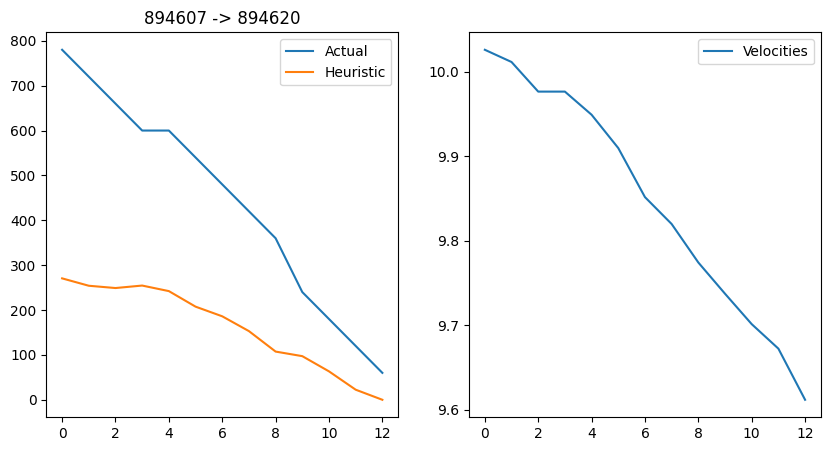

In [528]:
test_cases = [(127746, 127756), (0, 43), (30550, 30573), (181624, 181660), (543733, 543769), (612939, 612964), (894607, 894620)]
for start, stop in test_cases:
    actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=velocity, alpha=alpha)
    visualize_heuristic(actual_times, heuristic_times, velocities, f'{start} -> {stop}')

In [503]:
start, stop = 127746, 127756
actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=velocity, alpha=alpha)


[127746] actual time: 00:17:00, heuristic time: 00:04:44
[127747] actual time: 00:16:00, heuristic time: 00:04:16
[127748] actual time: 00:14:00, heuristic time: 00:03:49
[127749] actual time: 00:13:00, heuristic time: 00:03:26
[127750] actual time: 00:12:00, heuristic time: 00:03:06
[127751] actual time: 00:11:00, heuristic time: 00:02:48
[127752] actual time: 00:09:00, heuristic time: 00:02:07
[127753] actual time: 00:07:00, heuristic time: 00:01:21
[127754] actual time: 00:05:00, heuristic time: 00:01:00
[127755] actual time: 00:03:00, heuristic time: 00:00:00


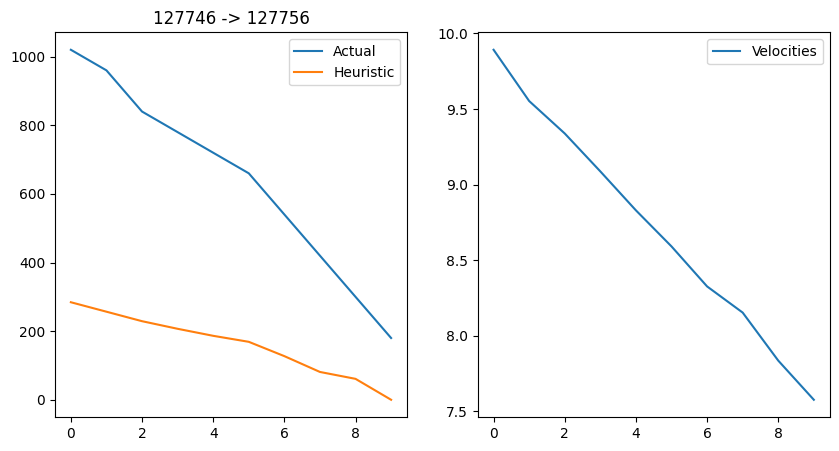

In [504]:
visualize_heuristic(actual_times, heuristic_times, velocities, f'{start} -> {stop}', )

In [500]:
start, stop = 0, 43
actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=5, alpha=0.05)

[0] actual time: 01:08:00, heuristic time: 00:25:30
[1] actual time: 01:07:00, heuristic time: 00:24:13
[2] actual time: 01:06:00, heuristic time: 00:22:47
[3] actual time: 01:04:00, heuristic time: 00:23:12
[4] actual time: 01:02:00, heuristic time: 00:23:15
[5] actual time: 01:01:00, heuristic time: 00:23:50
[6] actual time: 01:00:00, heuristic time: 00:24:22
[7] actual time: 00:59:00, heuristic time: 00:24:42
[8] actual time: 00:58:00, heuristic time: 00:25:43
[9] actual time: 00:57:00, heuristic time: 00:26:13
[10] actual time: 00:56:00, heuristic time: 00:27:46
[11] actual time: 00:54:00, heuristic time: 00:27:48
[12] actual time: 00:51:00, heuristic time: 00:26:29
[13] actual time: 00:49:00, heuristic time: 00:25:12
[14] actual time: 00:48:00, heuristic time: 00:24:55
[15] actual time: 00:45:00, heuristic time: 00:22:40
[16] actual time: 00:43:00, heuristic time: 00:20:41
[17] actual time: 00:41:00, heuristic time: 00:18:14
[18] actual time: 00:39:00, heuristic time: 00:17:10
[19

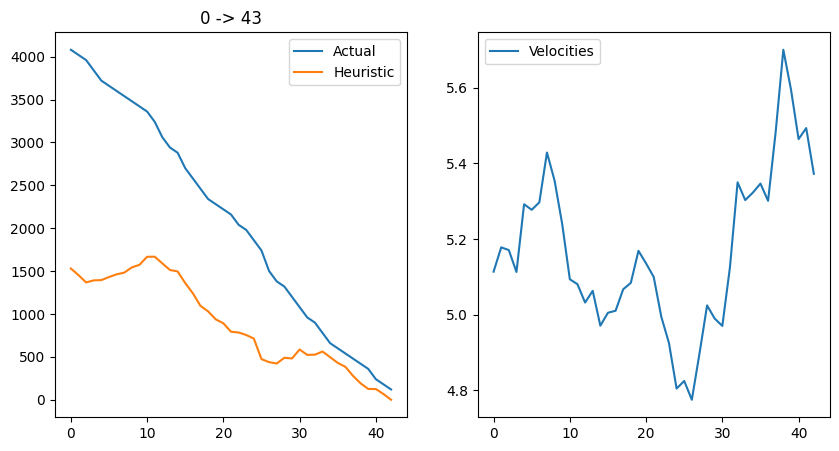

In [501]:
visualize_heuristic(actual_times, heuristic_times, velocities,f'{start} -> {stop}')

In [480]:
start, stop = 30550, 30573
actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=5, alpha=0.05)

[30550] actual time: 00:44:00, heuristic time: 00:23:51
[30551] actual time: 00:42:00, heuristic time: 00:22:40
[30552] actual time: 00:40:00, heuristic time: 00:24:00
[30553] actual time: 00:38:00, heuristic time: 00:24:40
[30554] actual time: 00:37:00, heuristic time: 00:24:03
[30555] actual time: 00:36:00, heuristic time: 00:22:35
[30556] actual time: 00:35:00, heuristic time: 00:20:21
[30557] actual time: 00:33:00, heuristic time: 00:18:04
[30558] actual time: 00:31:00, heuristic time: 00:16:27
[30559] actual time: 00:30:00, heuristic time: 00:14:50
[30560] actual time: 00:27:00, heuristic time: 00:15:04
[30561] actual time: 00:26:00, heuristic time: 00:14:19
[30562] actual time: 00:25:00, heuristic time: 00:13:51
[30563] actual time: 00:23:00, heuristic time: 00:11:51
[30564] actual time: 00:20:00, heuristic time: 00:11:35
[30565] actual time: 00:18:00, heuristic time: 00:09:22
[30566] actual time: 00:14:00, heuristic time: 00:09:08
[30567] actual time: 00:11:00, heuristic time: 0

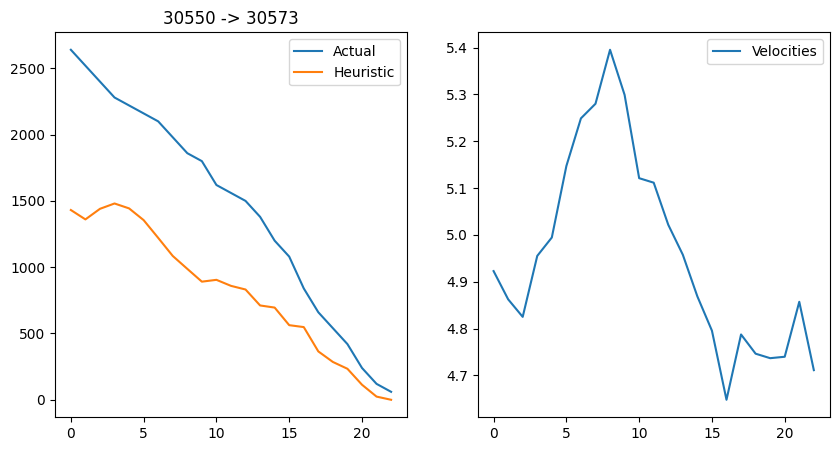

In [481]:
visualize_heuristic(actual_times, heuristic_times, velocities,f'{start} -> {stop}')

In [495]:
start, stop = 181624, 181660
actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=10, alpha=0.05)

[181624] actual time: 00:55:00, heuristic time: 00:27:41
[181625] actual time: 00:54:00, heuristic time: 00:27:27
[181626] actual time: 00:53:00, heuristic time: 00:27:05
[181627] actual time: 00:52:00, heuristic time: 00:27:01
[181628] actual time: 00:50:00, heuristic time: 00:26:53
[181629] actual time: 00:49:00, heuristic time: 00:26:14
[181630] actual time: 00:47:00, heuristic time: 00:26:17
[181631] actual time: 00:45:00, heuristic time: 00:26:34
[181632] actual time: 00:44:00, heuristic time: 00:26:17
[181633] actual time: 00:42:00, heuristic time: 00:26:58
[181634] actual time: 00:40:00, heuristic time: 00:26:45
[181635] actual time: 00:37:00, heuristic time: 00:26:14
[181636] actual time: 00:35:00, heuristic time: 00:26:34
[181637] actual time: 00:34:00, heuristic time: 00:26:44
[181638] actual time: 00:32:00, heuristic time: 00:26:30
[181639] actual time: 00:29:00, heuristic time: 00:25:25
[181640] actual time: 00:27:00, heuristic time: 00:24:46
[181641] actual time: 00:26:00,

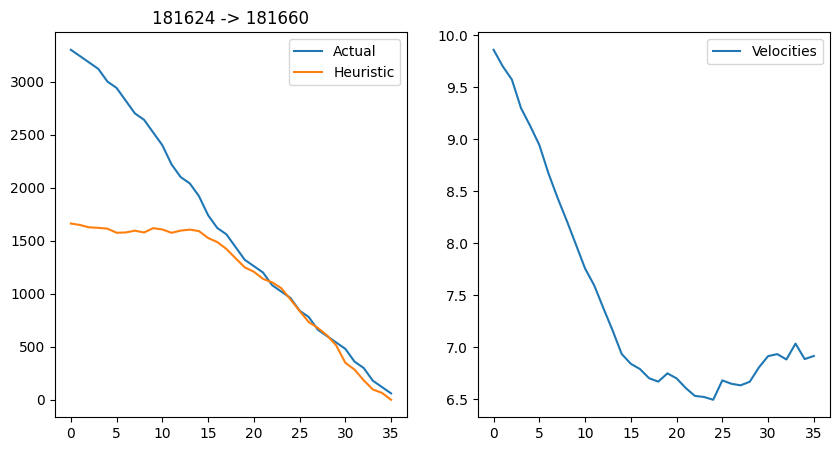

In [496]:
visualize_heuristic(actual_times, heuristic_times, velocities, f'{start} -> {stop}')

In [484]:
start, stop = 543733, 543769
actual_times, heuristic_times, velocities = run_heuristic(start, stop, velocity=6, alpha=0.05)

[543733] actual time: 00:40:00, heuristic time: 00:02:14
[543734] actual time: 00:39:00, heuristic time: 00:03:04
[543735] actual time: 00:38:00, heuristic time: 00:04:33
[543736] actual time: 00:37:00, heuristic time: 00:05:16
[543737] actual time: 00:36:00, heuristic time: 00:06:29
[543738] actual time: 00:35:00, heuristic time: 00:07:06
[543739] actual time: 00:34:00, heuristic time: 00:08:38
[543740] actual time: 00:33:00, heuristic time: 00:09:18
[543741] actual time: 00:32:00, heuristic time: 00:10:08
[543742] actual time: 00:31:00, heuristic time: 00:11:07
[543743] actual time: 00:30:00, heuristic time: 00:11:53
[543744] actual time: 00:29:00, heuristic time: 00:12:52
[543745] actual time: 00:28:00, heuristic time: 00:13:46
[543746] actual time: 00:27:00, heuristic time: 00:14:34
[543747] actual time: 00:26:00, heuristic time: 00:15:21
[543748] actual time: 00:25:00, heuristic time: 00:16:58
[543749] actual time: 00:23:00, heuristic time: 00:18:28
[543750] actual time: 00:21:00,

C:\Users\julia\AppData\Local\Temp\ipykernel_31752\2458007467.py:15: RuntimeWarning: divide by zero encountered in divide
  velocity = alpha * (dist_from_prev / time_from_prev) + (1 - alpha) * velocity


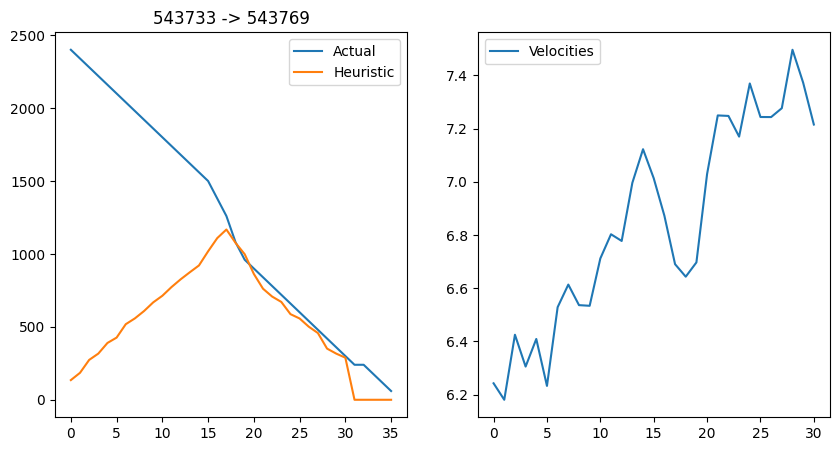

In [485]:
visualize_heuristic(actual_times, heuristic_times, velocities, f'{start} -> {stop}')

In [212]:
def scale_heuristic(current_time, stop_start, stop_current, stop_goal):
    return current_time / distance_round(stop_start, stop_current) * distance_m(stop_current, stop_goal)

In [169]:
def running_dist_heuristic(current_time, running_dist, stop_current, stop_goal):
    return current_time / running_dist * distance_m(stop_current, stop_goal)

In [170]:
start, stop = 0, 29
running_dist = 0
actual_times = []
heuristic_times = []
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    time_from_start = time_diff(start, i + 1) 
    running_dist += distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    heuristic_time = running_dist_heuristic(time_from_start, running_dist, g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))))
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[0] actual time: 00:48:00, heuristic time: 00:27:22
[1] actual time: 00:47:00, heuristic time: 00:20:59
[2] actual time: 00:46:00, heuristic time: 00:19:00
[3] actual time: 00:44:00, heuristic time: 00:20:34
[4] actual time: 00:42:00, heuristic time: 00:19:44
[5] actual time: 00:41:00, heuristic time: 00:20:32
[6] actual time: 00:40:00, heuristic time: 00:21:09
[7] actual time: 00:39:00, heuristic time: 00:21:22
[8] actual time: 00:38:00, heuristic time: 00:22:36
[9] actual time: 00:37:00, heuristic time: 00:23:28
[10] actual time: 00:36:00, heuristic time: 00:26:15
[11] actual time: 00:34:00, heuristic time: 00:25:53
[12] actual time: 00:31:00, heuristic time: 00:27:13
[13] actual time: 00:29:00, heuristic time: 00:25:30
[14] actual time: 00:28:00, heuristic time: 00:26:07
[15] actual time: 00:25:00, heuristic time: 00:22:44
[16] actual time: 00:23:00, heuristic time: 00:20:31
[17] actual time: 00:21:00, heuristic time: 00:18:08
[18] actual time: 00:19:00, heuristic time: 00:17:10
[19

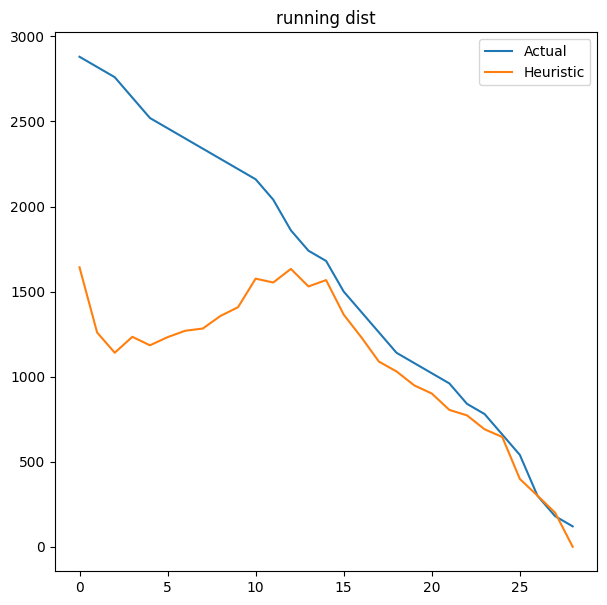

In [172]:
visualize_heuristic(actual_times, heuristic_times, 'running dist')

In [173]:
start, stop = 127746, 127807
running_dist = 0
actual_times = []
heuristic_times = []
max_vel = 0
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    time_from_start = time_diff(start, i + 1) 
    running_dist += distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    heuristic_time = running_dist_heuristic(time_from_start, running_dist, g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))))
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[127746] actual time: 03:53:00, heuristic time: 00:41:14
[127747] actual time: 03:52:00, heuristic time: 00:36:12
[127748] actual time: 03:50:00, heuristic time: 00:29:59
[127749] actual time: 03:49:00, heuristic time: 00:27:19
[127750] actual time: 03:48:00, heuristic time: 00:25:38
[127751] actual time: 03:47:00, heuristic time: 00:23:41
[127752] actual time: 03:45:00, heuristic time: 00:22:07
[127753] actual time: 03:43:00, heuristic time: 00:18:32
[127754] actual time: 03:41:00, heuristic time: 00:18:49
[127755] actual time: 03:39:00, heuristic time: 00:18:12
[127756] actual time: 03:36:00, heuristic time: 00:17:12
[127757] actual time: 03:34:00, heuristic time: 00:14:16
[127758] actual time: 03:32:00, heuristic time: 00:11:05
[127759] actual time: 03:31:00, heuristic time: 00:08:51
[127760] actual time: 03:30:00, heuristic time: 00:07:16
[127761] actual time: 03:29:00, heuristic time: 00:06:18
[127762] actual time: 03:27:00, heuristic time: 00:04:51
[127763] actual time: 03:26:00,

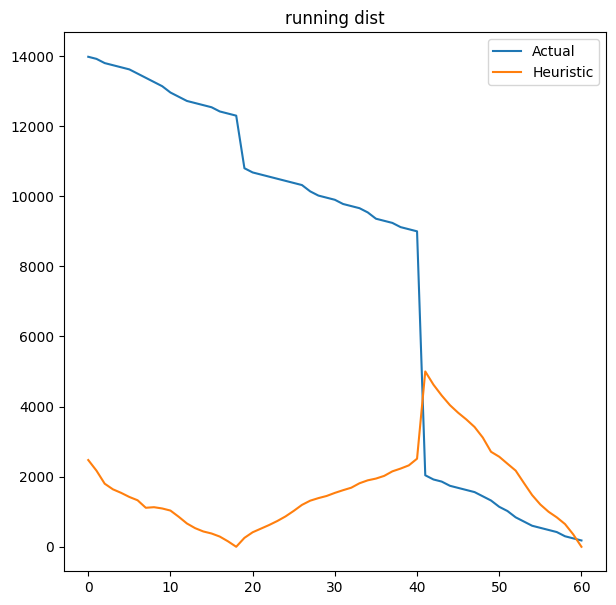

In [174]:
visualize_heuristic(actual_times, heuristic_times, 'running dist')

In [155]:
def max_velocity_heuristic(max_velocity, stop_current, stop_goal):
    return distance_m(stop_current, stop_goal) / max_velocity

In [156]:
start, stop = 0, 29
running_dist = 0
actual_times = []
heuristic_times = []
max_vel = 0
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    time_from_start = time_diff(start, i + 1) 
    time_between_stops = time_diff(i + 1)
    dist = distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    max_vel = max((dist / time_between_stops), max_vel)
    heuristic_time = max_velocity_heuristic(max_vel, g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))))
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[0] actual time: 00:48:00, heuristic time: 00:13:41
[1] actual time: 00:47:00, heuristic time: 00:13:09
[2] actual time: 00:46:00, heuristic time: 00:12:24
[3] actual time: 00:44:00, heuristic time: 00:12:50
[4] actual time: 00:42:00, heuristic time: 00:11:28
[5] actual time: 00:41:00, heuristic time: 00:11:55
[6] actual time: 00:40:00, heuristic time: 00:12:26
[7] actual time: 00:39:00, heuristic time: 00:13:12
[8] actual time: 00:38:00, heuristic time: 00:13:39
[9] actual time: 00:37:00, heuristic time: 00:13:42
[10] actual time: 00:36:00, heuristic time: 00:14:14
[11] actual time: 00:34:00, heuristic time: 00:14:03
[12] actual time: 00:31:00, heuristic time: 00:13:06
[13] actual time: 00:29:00, heuristic time: 00:12:29
[14] actual time: 00:28:00, heuristic time: 00:12:24
[15] actual time: 00:25:00, heuristic time: 00:11:06
[16] actual time: 00:23:00, heuristic time: 00:10:10
[17] actual time: 00:21:00, heuristic time: 00:09:14
[18] actual time: 00:19:00, heuristic time: 00:08:48
[19

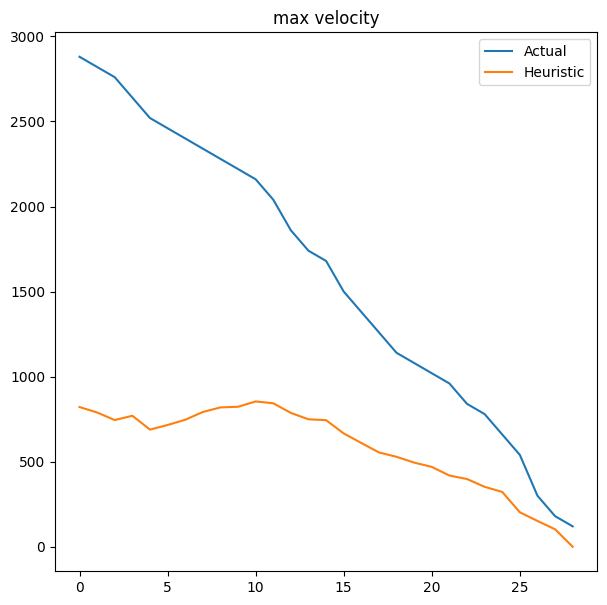

In [157]:
visualize_heuristic(actual_times, heuristic_times, 'max velocity')

In [165]:
g.conn_at_index(127746)

line                              6
departure_time             06:43:00
arrival_time               06:45:00
start_stop                  KROMERA
end_stop          Mosty Warszawskie
start_stop_lat            51.131761
start_stop_lon            17.065146
end_stop_lat              51.128473
end_stop_lon              17.054579
departure_sec                 24180
arrival_sec                   24300
Name: 127746, dtype: object

In [167]:
start, stop = 127746, 127807
running_dist = 0
actual_times = []
heuristic_times = []
max_vel = 0
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    time_from_start = time_diff(start, i + 1) 
    time_between_stops = time_diff(i + 1)
    dist = distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    max_vel = max((dist / time_between_stops), max_vel)
    heuristic_time = max_velocity_heuristic(max_vel, g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))))
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[127746] actual time: 03:53:00, heuristic time: 00:13:44
[127747] actual time: 03:52:00, heuristic time: 00:12:59
[127748] actual time: 03:50:00, heuristic time: 00:12:19
[127749] actual time: 03:49:00, heuristic time: 00:11:46
[127750] actual time: 03:48:00, heuristic time: 00:11:16
[127751] actual time: 03:47:00, heuristic time: 00:10:46
[127752] actual time: 03:45:00, heuristic time: 00:09:56
[127753] actual time: 03:43:00, heuristic time: 00:08:47
[127754] actual time: 03:41:00, heuristic time: 00:08:20
[127755] actual time: 03:39:00, heuristic time: 00:07:46
[127756] actual time: 03:36:00, heuristic time: 00:07:10
[127757] actual time: 03:34:00, heuristic time: 00:06:05
[127758] actual time: 03:32:00, heuristic time: 00:04:39
[127759] actual time: 03:31:00, heuristic time: 00:03:51
[127760] actual time: 03:30:00, heuristic time: 00:03:13
[127761] actual time: 03:29:00, heuristic time: 00:02:43
[127762] actual time: 03:27:00, heuristic time: 00:02:07
[127763] actual time: 03:26:00,

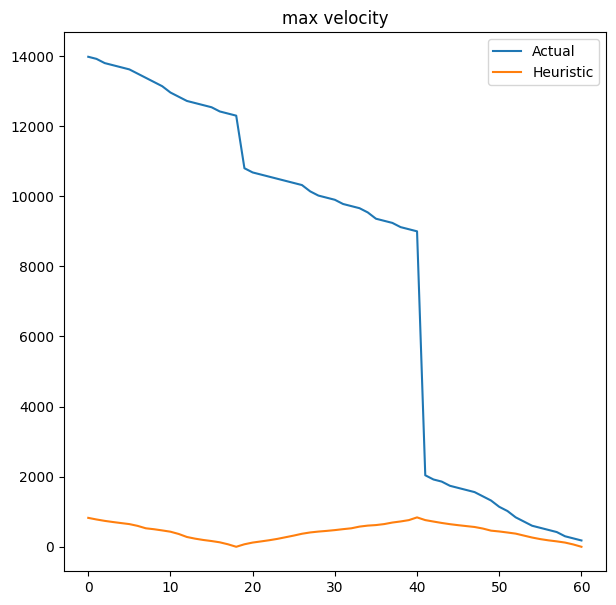

In [168]:
visualize_heuristic(actual_times, heuristic_times, 'max velocity')

In [149]:
def avg_velocity_heuristic(avg_velocity, stop_current, stop_goal):
    return distance_m(stop_current, stop_goal) / avg_velocity

In [153]:
start, stop = 0, 29
running_dist = 0
actual_times = []
heuristic_times = []
max_vel = 0
for i in range(start, stop):
    actual_time = time_diff(i + 1, stop)    # aka cost 
    actual_times.append(actual_time)
    time_from_start = time_diff(start, i + 1) 
    time_between_stops = time_diff(i + 1)
    running_dist += distance_m(g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), g.stop_as_tuple(g.rename_stop(g.conn_at_index(i))))
    avg_vel = running_dist / time_from_start
    heuristic_time = avg_velocity_heuristic(avg_vel, g.stop_as_tuple(g.rename_stop(g.conn_at_index(i + 1))), 
          g.stop_as_tuple(g.rename_stop(g.conn_at_index(stop))))
    heuristic_times.append(heuristic_time)
    # assert heuristic_time <= actual_time, f'heuristic time is greater for {i}'
    print(f'[{i}] actual time: {sec_to_time(actual_time)}, heuristic time: {sec_to_time(heuristic_time)}')

[0] actual time: 00:48:00, heuristic time: 00:27:22
[1] actual time: 00:47:00, heuristic time: 00:20:59
[2] actual time: 00:46:00, heuristic time: 00:19:00
[3] actual time: 00:44:00, heuristic time: 00:20:34
[4] actual time: 00:42:00, heuristic time: 00:19:44
[5] actual time: 00:41:00, heuristic time: 00:20:32
[6] actual time: 00:40:00, heuristic time: 00:21:09
[7] actual time: 00:39:00, heuristic time: 00:21:22
[8] actual time: 00:38:00, heuristic time: 00:22:36
[9] actual time: 00:37:00, heuristic time: 00:23:28
[10] actual time: 00:36:00, heuristic time: 00:26:15
[11] actual time: 00:34:00, heuristic time: 00:25:53
[12] actual time: 00:31:00, heuristic time: 00:27:13
[13] actual time: 00:29:00, heuristic time: 00:25:30
[14] actual time: 00:28:00, heuristic time: 00:26:07
[15] actual time: 00:25:00, heuristic time: 00:22:44
[16] actual time: 00:23:00, heuristic time: 00:20:31
[17] actual time: 00:21:00, heuristic time: 00:18:08
[18] actual time: 00:19:00, heuristic time: 00:17:10
[19

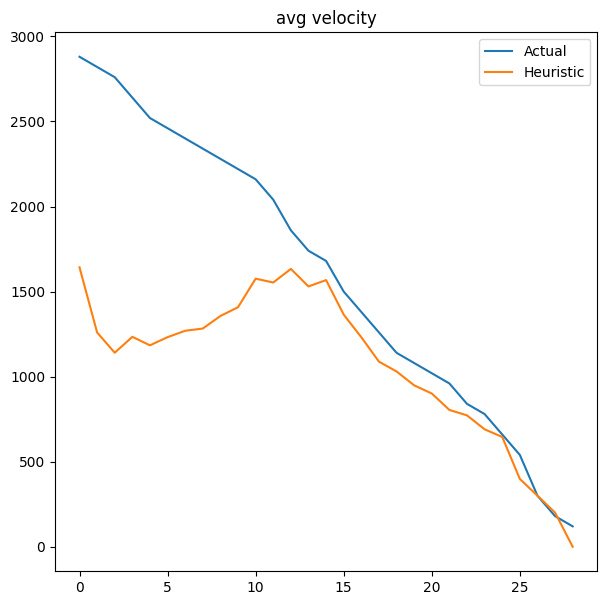

In [154]:
visualize_heuristic(actual_times, heuristic_times, 'avg velocity')

In [7]:
s1 = ('PL. GRUNWALDZKI', 51.111452, 17.060529)

In [8]:
g.get_neighbour_lines(s1)

,end_stop,line


In [2]:
connection_graph = pd.read_csv(DATA_DIR / 'connection_graph.csv',
                                   usecols=['line', 'departure_time', 'arrival_time', 'start_stop',
                                            'end_stop', 'start_stop_lat', 'start_stop_lon', 'end_stop_lat',
                                            'end_stop_lon'])
graph = Graph(connection_graph, add_constant_change_time)

C:\Users\julia\AppData\Local\Temp\ipykernel_17096\792084044.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  connection_graph = pd.read_csv(DATA_DIR / 'connection_graph.csv',


In [12]:
import re
from queue import PriorityQueue
from typing import Callable
from ai_data_eng.searching.a_star import Heuristic


def find_path_a_star_t(graph: Graph, start_stop: str, goal_stop: str, leave_hour: str):
    frontier = PriorityQueue()
    dep_time = time_to_normalized_sec(leave_hour)

    cost_so_far = {}
    # if commuting A -> B, then this will be came_from_conn[B] = A so we can recreate the path
    came_from_conn = {}
    goal_stop_coords = graph.compute_stop_coords(goal_stop)
    goal_stop = (goal_stop, goal_stop_coords['stop_lat'], goal_stop_coords['stop_lon'])
    # given only stop name consider all possible start stops??
    j = -1
    for (candidate_start_stop, _, _) in graph.get_possible_stops_t(start_stop):
        cost_so_far[candidate_start_stop] = 0
        # graph.add_conn(dep_time, candidate_start_stop, j)
        came_from_conn[candidate_start_stop] = None
        frontier.put((cost_so_far[candidate_start_stop], ('', candidate_start_stop)))
        # j -= 1

    with open(DATA_DIR / ('a_star_runs/p_opt' + re.sub(r"\W+", "", start_stop) + '-' + re.sub(r"\W+", "", goal_stop[0])),
              mode='w', encoding='utf-8') as f:

        i = 0
        while not frontier.empty():
            # get the stop with the lowest cost
            cost, (line, current) = frontier.get()

            # consider all possible end stops
            if current == goal_stop[0]:
                goal_line = line 
                # theory - first found is the best
                break

            print(f'[{i}]', file=f)
            cost = cost_so_far[current]
            for next_conn in graph.get_neighbour_lines(current):
                # cost of commuting start --> current and current --> next
                next_stop_coords = graph.compute_stop_coords(next_conn.end_stop)
                next_stop = (next_conn.end_stop, next_stop_coords['stop_lat'], next_stop_coords['stop_lon'])
                new_cost = cost + (1 if line != '' and next_conn.line != line else 0)
                # heuristic_cost = heuristic.compute(current, next_stop, goal_stop, next_conn)
                approx_goal_cost = new_cost # + heuristic_cost
                if next_conn.end_stop not in cost_so_far or new_cost < cost_so_far[next_conn.end_stop]:
                    # a_star_print_info(next_conn, new_cost, heuristic_cost, file=f)
                    cost_so_far[next_conn.end_stop] = new_cost
                    frontier.put((approx_goal_cost, (next_conn.line, next_conn.end_stop)))
                    came_from_conn[next_conn.end_stop] = (current, line)
            i += 1

    return goal_line, came_from_conn, cost_so_far

In [11]:
goal_line, came_from_conn, cost_so_far = find_path_a_star_t(graph, "PL. GRUNWALDZKI", "most Grunwaldzki", "20:32:00")

TypeError: Could not convert ['L' '.'] to numeric